In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import re
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec

In [2]:
data_path_nadp = "data/exp1-nadp/nadp.csv"
data_path_adp = "data/exp1-adp-ctr/adp_change_time_report.csv";
follower_id_adp= "29ecf290d55d"
follower_id_nadp = "0041efd6ad46"
day = "dom"
cpu_limit = 20

In [3]:
data_adp = pd.read_csv(data_path_adp, delim_whitespace=True, header=None)
data_nadp = pd.read_csv(data_path_nadp, delim_whitespace=True, header=None)

In [4]:
# adp #

ts_temp_adp = pd.DataFrame()
ts_temp_adp[0] = (data_adp[data_adp[0] == day][0]).astype(str).str.replace('dom', 'Sun')
ts_temp_adp[1] = (data_adp[data_adp[0] == day][1]).astype(str)
ts_temp_adp[2] = (data_adp[data_adp[0] == day][2]).astype(str).str.replace('ott', 'Oct')
ts_temp_adp[3] = (data_adp[data_adp[0] == day][3]).astype(str).str.replace(",", "")
ts_temp_adp[4] = (data_adp[data_adp[0] == day][4]).astype(str).str.replace(",", "")
ts_temp_adp[5] = (data_adp[data_adp[0] == day][5]).astype(str)

ts_adp = pd.DataFrame(columns=["timestamp"])
ts_adp["timestamp"] = pd.to_datetime(ts_temp_adp[0] + " " + ts_temp_adp[1] + " " + ts_temp_adp[2] + " " + ts_temp_adp[3] + " " + ts_temp_adp[4] + " " + ts_temp_adp[5])


#nadp#

ts_temp_nadp = pd.DataFrame()
ts_temp_nadp[0] = (data_nadp[data_nadp[0] == day][0]).astype(str).str.replace('dom', 'Sun')
ts_temp_nadp[1] = (data_nadp[data_nadp[0] == day][1]).astype(str)
ts_temp_nadp[2] = (data_nadp[data_nadp[0] == day][2]).astype(str).str.replace('ott', 'Oct')
ts_temp_nadp[3] = (data_nadp[data_nadp[0] == day][3]).astype(str).str.replace(",", "")
ts_temp_nadp[4] = (data_nadp[data_nadp[0] == day][4]).astype(str).str.replace(",", "")
ts_temp_nadp[5] = (data_nadp[data_nadp[0] == day][5]).astype(str)

ts_nadp = pd.DataFrame(columns=["timestamp"])
ts_nadp["timestamp"] = pd.to_datetime(ts_temp_nadp[0] + " " + ts_temp_nadp[1] + " " + ts_temp_nadp[2] + " " + ts_temp_nadp[3] + " " + ts_temp_nadp[4] + " " + ts_temp_nadp[5])

In [5]:
# adp #

df_adp = pd.DataFrame(columns=["ID", "Name", "CPU%", "MEM_USAGE", "MEM_LIMIT", "MEM%", "NET_I", "NET_O", "BLOCK_I", "BLOCK_O", "PIDs", "timedelta"])
df_adp["ID"] = data_adp[data_adp[0] == follower_id_adp][0]
df_adp["Name"] = data_adp[data_adp[0] == follower_id_adp][1]
df_adp["CPU%"] = data_adp[data_adp[0] == follower_id_adp][2]
df_adp["MEM_USAGE"] = data_adp[data_adp[0] == follower_id_adp][3]
df_adp["MEM_LIMIT"] = data_adp[data_adp[0] == follower_id_adp][5]
df_adp["MEM%"] = data_adp[data_adp[0] == follower_id_adp][6]
df_adp["NET_I"] = data_adp[data_adp[0] == follower_id_adp][7]
df_adp["NET_O"] = data_adp[data_adp[0] == follower_id_adp][9]
df_adp["BLOCK_I"] = data_adp[data_adp[0] == follower_id_adp][10]
df_adp["BLOCK_O"] = data_adp[data_adp[0] == follower_id_adp][12]
df_adp["PIDs"] = data_adp[data_adp[0] == follower_id_adp][13]

# nadp #
df_nadp = pd.DataFrame(columns=["ID", "Name", "CPU%", "MEM_USAGE", "MEM_LIMIT", "MEM%", "NET_I", "NET_O", "BLOCK_I", "BLOCK_O", "PIDs", "timedelta"])
df_nadp["ID"] = data_nadp[data_nadp[0] == follower_id_nadp][0]
df_nadp["Name"] = data_nadp[data_nadp[0] == follower_id_nadp][1]
df_nadp["CPU%"] = data_nadp[data_nadp[0] == follower_id_nadp][2]
df_nadp["MEM_USAGE"] = data_nadp[data_nadp[0] == follower_id_nadp][3]
df_nadp["MEM_LIMIT"] = data_nadp[data_nadp[0] == follower_id_nadp][5]
df_nadp["MEM%"] = data_nadp[data_nadp[0] == follower_id_nadp][6]
df_nadp["NET_I"] = data_nadp[data_nadp[0] == follower_id_nadp][7]
df_nadp["NET_O"] = data_nadp[data_nadp[0] == follower_id_nadp][9]
df_nadp["BLOCK_I"] = data_nadp[data_nadp[0] == follower_id_nadp][10]
df_nadp["BLOCK_O"] = data_nadp[data_nadp[0] == follower_id_nadp][12]
df_nadp["PIDs"] = data_nadp[data_nadp[0] == follower_id_nadp][13]

In [6]:
# reset index #
df_adp.reset_index(drop=True, inplace=True)
df_nadp.reset_index(drop=True, inplace=True)
ts_adp.reset_index(drop=True, inplace=True)
ts_nadp.reset_index(drop=True, inplace=True)

In [7]:
df_adp["timestamp"] = ts_adp["timestamp"]
df_nadp["timestamp"] = ts_nadp["timestamp"]

df_adp = df_adp[df_adp["timestamp"] < df_adp["timestamp"][0] + pd.to_timedelta(1801, unit='s')]
df_nadp = df_nadp[df_nadp["timestamp"] < df_nadp["timestamp"][0] + pd.to_timedelta(1801, unit='s')]

In [8]:
# set timestamp #

# adp #
time_0_adp = ts_adp["timestamp"][0]
ls_adp = []
for idx, row in ts_adp.iterrows():
    ls_adp.append(pd.Timedelta(row["timestamp"] - time_0_adp))
ts_adp["timedelta"] = ls_adp

# nadp #
time_0_nadp = ts_nadp["timestamp"][0]
ls_nadp = []
for idx, row in ts_nadp.iterrows():
    ls_nadp.append(pd.Timedelta(row["timestamp"] - time_0_nadp))
ts_nadp["timedelta"] = ls_nadp

In [9]:
df_adp["timedelta"] = ts_adp["timedelta"].dt.seconds
df_nadp["timedelta"] = ts_nadp["timedelta"].dt.seconds

df_adp["timedelta"] = pd.to_datetime(df_adp['timedelta'], unit='s')
df_nadp["timedelta"] = pd.to_datetime(df_nadp['timedelta'], unit='s')

In [10]:
# adp #
df_adp['CPU%'] = df_adp['CPU%'].str.replace('%','')
df_adp['MEM%'] = df_adp['MEM%'].str.replace('%','')
df_adp["CPU%"] = df_adp["CPU%"].astype(float)
df_adp["MEM%"] = df_adp["MEM%"].astype(float)

# nadp #
df_nadp['CPU%'] = df_nadp['CPU%'].str.replace('%','')
df_nadp['MEM%'] = df_nadp['MEM%'].str.replace('%','')
df_nadp["CPU%"] = df_nadp["CPU%"].astype(float)
df_nadp["MEM%"] = df_nadp["MEM%"].astype(float)

In [11]:
values_net_i = []
um_net_i = []
for s in df_adp["NET_I"]:
    values_net_i.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_net_i.append(re.findall("[a-zA-Z]+", s)[0])

values_net_o = []
um_net_o = []
for s in df_adp["NET_O"]:
    values_net_o.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_net_o.append(re.findall("[a-zA-Z]+", s)[0])
    
values_mem_usage = []
um_mem_usage = []
for s in df_adp["MEM_USAGE"]:
    values_mem_usage.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_mem_usage.append(re.findall("[a-zA-Z]+", s)[0])

values_mem_limit = []
um_mem_limit = []
for s in df_adp["MEM_LIMIT"]:
    values_mem_limit.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_mem_limit.append(re.findall("[a-zA-Z]+", s)[0])

df_adp["NET_I_values"] = values_net_i
df_adp["NET_I_um"] = um_net_i
df_adp["NET_O_values"] = values_net_o
df_adp["NET_O_um"] = um_net_o
df_adp["MEM_USAGE_values"] = values_mem_usage
df_adp["MEM_USAGE_um"] = um_mem_usage
df_adp["MEM_LIMIT_values"] = values_mem_limit
df_adp["MEM_LIMIT_um"] = um_mem_limit

df_adp["NET_I_values"] = df_adp["NET_I_values"].astype(float)
df_adp["NET_O_values"] = df_adp["NET_O_values"].astype(float)
df_adp["MEM_USAGE_values"] = df_adp["MEM_USAGE_values"].astype(float)
df_adp["MEM_LIMIT_values"] = df_adp["MEM_LIMIT_values"].astype(float)


#####################


values_net_i = []
um_net_i = []
for s in df_nadp["NET_I"]:
    values_net_i.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_net_i.append(re.findall("[a-zA-Z]+", s)[0])

values_net_o = []
um_net_o = []
for s in df_nadp["NET_O"]:
    values_net_o.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_net_o.append(re.findall("[a-zA-Z]+", s)[0])
    
values_mem_usage = []
um_mem_usage = []
for s in df_nadp["MEM_USAGE"]:
    values_mem_usage.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_mem_usage.append(re.findall("[a-zA-Z]+", s)[0])

values_mem_limit = []
um_mem_limit = []
for s in df_nadp["MEM_LIMIT"]:
    values_mem_limit.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_mem_limit.append(re.findall("[a-zA-Z]+", s)[0])

df_nadp["NET_I_values"] = values_net_i
df_nadp["NET_I_um"] = um_net_i
df_nadp["NET_O_values"] = values_net_o
df_nadp["NET_O_um"] = um_net_o
df_nadp["MEM_USAGE_values"] = values_mem_usage
df_nadp["MEM_USAGE_um"] = um_mem_usage
df_nadp["MEM_LIMIT_values"] = values_mem_limit
df_nadp["MEM_LIMIT_um"] = um_mem_limit

df_nadp["NET_I_values"] = df_nadp["NET_I_values"].astype(float)
df_nadp["NET_O_values"] = df_nadp["NET_O_values"].astype(float)
df_nadp["MEM_USAGE_values"] = df_nadp["MEM_USAGE_values"].astype(float)
df_nadp["MEM_LIMIT_values"] = df_nadp["MEM_LIMIT_values"].astype(float)

In [12]:
vals_MB = {'kB': 0.001, 'MB':1, 'MiB':1.049, 'GB':1000, 'GiB':1024}

df_adp["NET_I (MB)"] = df_adp["NET_I_values"]*df_adp["NET_I_um"].map(vals_MB)
df_adp["NET_O (MB)"] = df_adp["NET_O_values"]*df_adp["NET_O_um"].map(vals_MB)
df_adp["MEM_USAGE (MB)"] = df_adp["MEM_USAGE_values"]*df_adp["MEM_USAGE_um"].map(vals_MB)
df_adp["MEM_LIMIT (MB)"] = df_adp["MEM_LIMIT_values"]*df_adp["MEM_LIMIT_um"].map(vals_MB)

df_nadp["NET_I (MB)"] = df_nadp["NET_I_values"]*df_nadp["NET_I_um"].map(vals_MB)
df_nadp["NET_O (MB)"] = df_nadp["NET_O_values"]*df_nadp["NET_O_um"].map(vals_MB)
df_nadp["MEM_USAGE (MB)"] = df_nadp["MEM_USAGE_values"]*df_nadp["MEM_USAGE_um"].map(vals_MB)
df_nadp["MEM_LIMIT (MB)"] = df_nadp["MEM_LIMIT_values"]*df_nadp["MEM_LIMIT_um"].map(vals_MB)

In [13]:
df_adp["CPU_LIMIT"] = cpu_limit
df_nadp["CPU_LIMIT"] = cpu_limit

In [14]:
df_adp["CPU_scaled%"] = (df_adp["CPU%"]*100)/df_adp["CPU_LIMIT"]
df_nadp["CPU_scaled%"] = (df_nadp["CPU%"]*100)/df_nadp["CPU_LIMIT"]

In [15]:
df_cpu = pd.DataFrame(columns=["adp", "nadp"])
df_cpu["adp"] = df_adp["CPU_scaled%"]
df_cpu["nadp"] = df_nadp["CPU_scaled%"]
df_cpu["timedelta_adp"] = df_adp["timedelta"]
df_cpu["timedelta_nadp"] = df_nadp["timedelta"]

df_mem = pd.DataFrame(columns=["adp", "nadp"])
df_mem["adp"] = df_adp["MEM%"]
df_mem["nadp"] = df_nadp["MEM%"]
df_mem["timedelta_adp"] = df_adp["timedelta"]
df_mem["timedelta_nadp"] = df_nadp["timedelta"]

df_pids = pd.DataFrame(columns=["adp", "nadp"])
df_pids["adp"] = df_adp["PIDs"]
df_pids["nadp"] = df_nadp["PIDs"]
df_pids["timedelta_adp"] = df_adp["timedelta"]
df_pids["timedelta_nadp"] = df_nadp["timedelta"]

df_netio = pd.DataFrame(columns=["adp_i", "adp_o", "nadp_i", "nadp_o"])
df_netio["adp_i"] = df_adp["NET_I (MB)"]
df_netio["nadp_i"] = df_nadp["NET_I (MB)"]
df_netio["adp_o"] = df_adp["NET_O (MB)"]
df_netio["nadp_o"] = df_nadp["NET_O (MB)"]
df_netio["timedelta_adp"] = df_adp["timedelta"]
df_netio["timedelta_nadp"] = df_nadp["timedelta"]

In [16]:
sns.set()
sns.set_style("whitegrid")

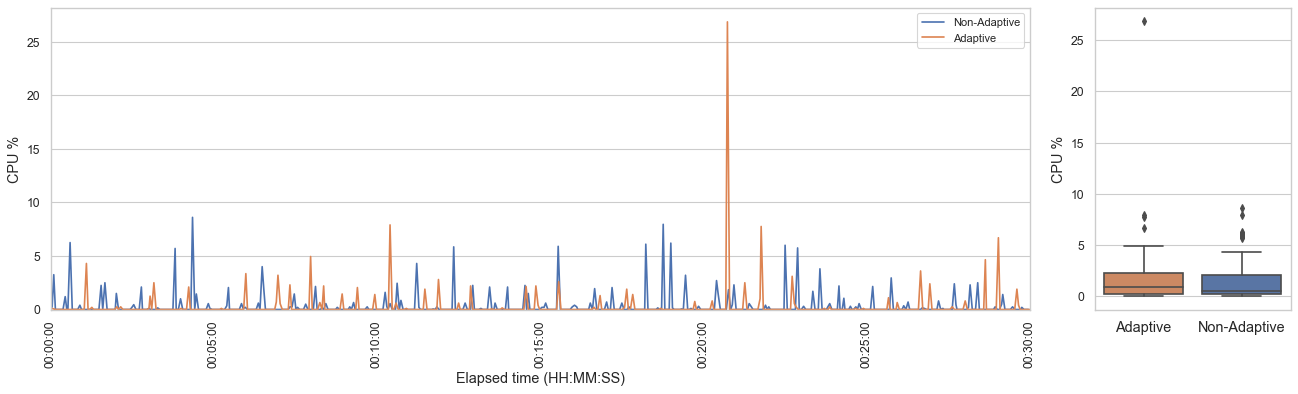

In [17]:
# Draw plot
f = plt.figure(figsize=(20,5), dpi=80)

gs = gridspec.GridSpec(1, 2,width_ratios=[5,1])
              
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

sns.lineplot(x='timedelta_nadp', y='nadp', data=df_cpu, ax=ax1, color=sns.color_palette()[0])
sns.lineplot(x='timedelta_adp', y='adp', data=df_cpu, ax=ax1, color=sns.color_palette()[1])

ax1.legend(["Non-Adaptive", "Adaptive"], loc="upper right", prop={'size': 10})

ax1.set_xlabel('Elapsed time (HH:MM:SS)', fontsize=13)
ax1.set_ylabel('CPU %', fontsize=13)

ax1.set_xlim(0, pd.to_datetime("1970-01-01 00:30:00"))
ax1.set_ylim(0)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax1.xaxis.set_tick_params(rotation=90)

colors = [sns.color_palette()[1], sns.color_palette()[0]]
sns.boxplot(data=df_cpu.mask(df_cpu == 0.0), ax=ax2, palette=colors);

ax2.set_xticklabels(['Adaptive', 'Non-Adaptive'], fontsize=13)
ax2.set_ylabel('CPU %', fontsize=13)

plt.subplots_adjust(wspace=0.11)

ax1.xaxis.grid(False)

plt.savefig("graphs/exp1-ctr/CPU_perc.pdf",bbox_inches='tight')

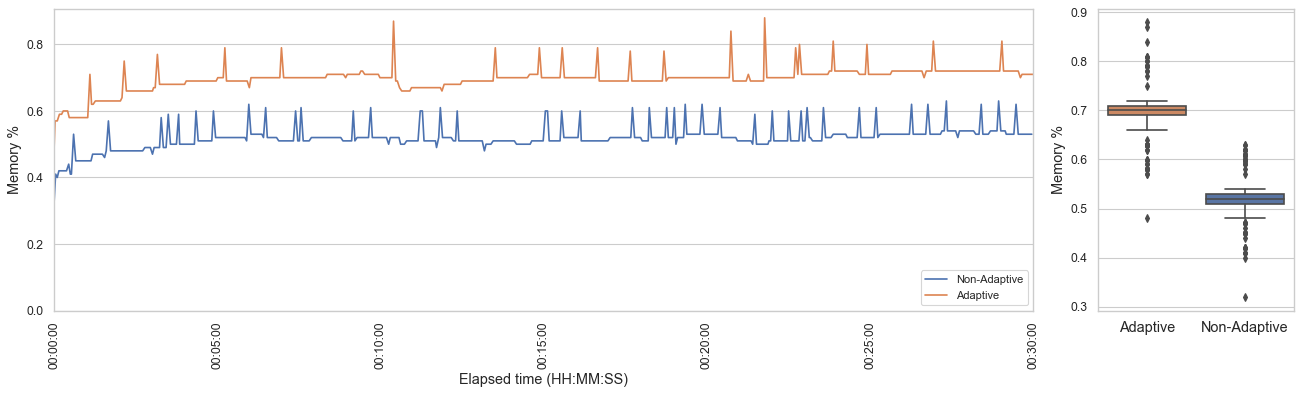

In [18]:
# Draw plot
f = plt.figure(figsize=(20,5), dpi=80)

gs = gridspec.GridSpec(1, 2,width_ratios=[5,1])
              
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

sns.lineplot(x='timedelta_nadp', y='nadp', data=df_mem, ax=ax1, color=sns.color_palette()[0])
sns.lineplot(x='timedelta_adp', y='adp', data=df_mem, ax=ax1, color=sns.color_palette()[1])

ax1.legend(["Non-Adaptive", "Adaptive"], loc="lower right", prop={'size': 10})

ax1.set_xlabel('Elapsed time (HH:MM:SS)', fontsize=13)
ax1.set_ylabel('Memory %', fontsize=13)

ax1.set_xlim(0, pd.to_datetime("1970-01-01 00:30:00"))
ax1.set_ylim(0)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax1.xaxis.set_tick_params(rotation=90)

colors = [sns.color_palette()[1], sns.color_palette()[0]]
sns.boxplot(data=df_mem, ax=ax2, palette=colors);

ax2.set_xticklabels(['Adaptive', 'Non-Adaptive'], fontsize=13)
ax2.set_ylabel('Memory %', fontsize=13)

plt.subplots_adjust(wspace=0.11)

ax1.xaxis.grid(False)

plt.savefig("graphs/exp1-ctr/MEM.pdf",bbox_inches='tight')

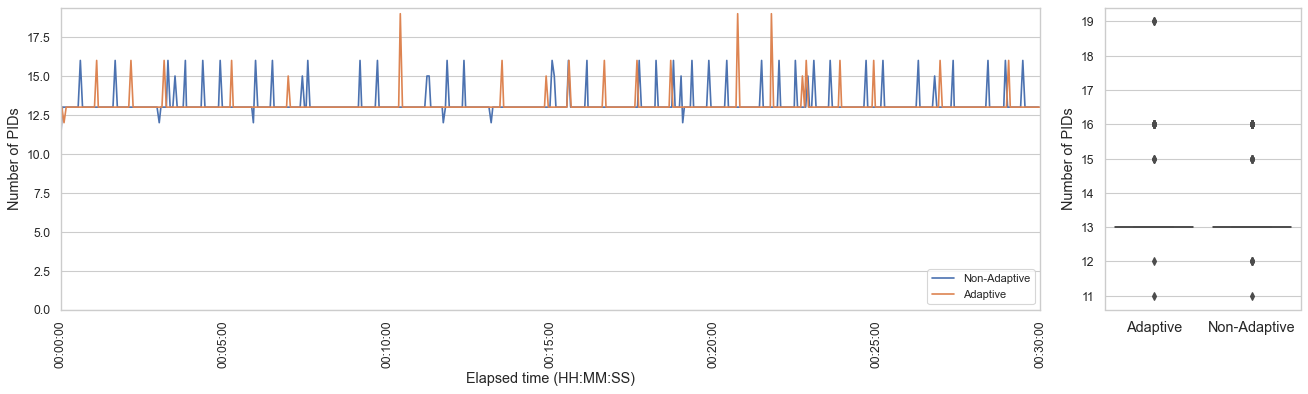

In [19]:
# Draw plot
f = plt.figure(figsize=(20,5), dpi=80)

gs = gridspec.GridSpec(1, 2,width_ratios=[5,1])
              
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

sns.lineplot(x='timedelta_nadp', y='nadp', data=df_pids, ax=ax1, color=sns.color_palette()[0])
sns.lineplot(x='timedelta_adp', y='adp', data=df_pids, ax=ax1, color=sns.color_palette()[1])

ax1.legend(["Non-Adaptive", "Adaptive"], loc="lower right", prop={'size': 10})

ax1.set_xlabel('Elapsed time (HH:MM:SS)', fontsize=13)
ax1.set_ylabel('Number of PIDs', fontsize=13)

ax1.set_xlim(0, pd.to_datetime("1970-01-01 00:30:00"))
ax1.set_ylim(0)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax1.xaxis.set_tick_params(rotation=90)

colors = [sns.color_palette()[1], sns.color_palette()[0]]
sns.boxplot(data=df_pids, ax=ax2, palette=colors);

ax2.set_xticklabels(['Adaptive', 'Non-Adaptive'], fontsize=13)
ax2.set_ylabel('Number of PIDs', fontsize=13)

plt.subplots_adjust(wspace=0.11)

ax1.xaxis.grid(False)

plt.savefig("graphs/exp1-ctr/PIDs.pdf",bbox_inches='tight')

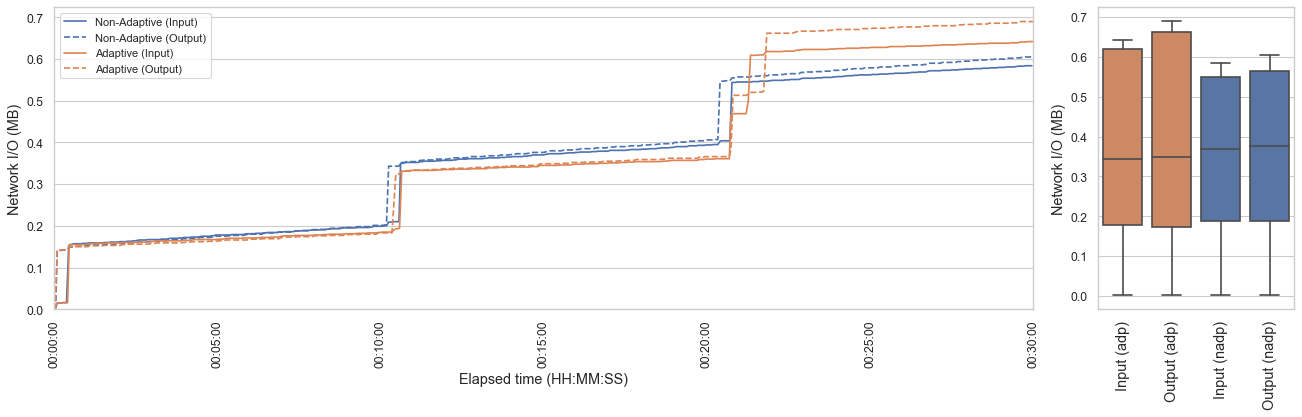

In [20]:
# Draw plot
f = plt.figure(figsize=(20,5), dpi=80)

gs = gridspec.GridSpec(1, 2,width_ratios=[5,1])
              
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

sns.lineplot(x='timedelta_nadp', y='nadp_i', data=df_netio, ax=ax1, color=sns.color_palette()[0])
sns.lineplot(x='timedelta_nadp', y='nadp_o', data=df_netio, ax=ax1, color=sns.color_palette()[0], linestyle="dashed")
sns.lineplot(x='timedelta_adp', y='adp_i', data=df_netio, ax=ax1, color=sns.color_palette()[1])
sns.lineplot(x='timedelta_adp', y='adp_o', data=df_netio, ax=ax1, color=sns.color_palette()[1], linestyle="dashed")

ax1.legend(["Non-Adaptive (Input)", "Non-Adaptive (Output)", "Adaptive (Input)", "Adaptive (Output)"], loc="upper left", prop={'size': 10})

ax1.set_xlabel('Elapsed time (HH:MM:SS)', fontsize=13)
ax1.set_ylabel('Network I/O (MB)', fontsize=13)

ax1.set_xlim(0, pd.to_datetime("1970-01-01 00:30:00"))
ax1.set_ylim(0)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax1.xaxis.set_tick_params(rotation=90)

colors = [sns.color_palette()[1], sns.color_palette()[1], sns.color_palette()[0], sns.color_palette()[0]]
sns.boxplot(data=df_netio, ax=ax2, palette=colors);

ax2.set_xticklabels(['Input (adp)', 'Output (adp)', 'Input (nadp)', 'Output (nadp)'], rotation=90, fontsize=13)
ax2.set_ylabel('Network I/O (MB)', fontsize=13)

plt.subplots_adjust(wspace=0.11)

ax1.xaxis.grid(False)

plt.savefig("graphs/exp1-ctr/NET_IO.pdf",bbox_inches='tight')

In [21]:
print("*******************************")
print("NET I/O ADP")
print("*******************************")
print("Input: ", df_adp["NET_I (MB)"].max(), "MB")
print("Output: ", df_adp["NET_O (MB)"].max(), "MB")

print("*******************************")
print("NET I/O NADP")
print("*******************************")
print("Input: ", df_nadp["NET_I (MB)"].max(), "MB")
print("Output: ", df_nadp["NET_O (MB)"].max(), "MB")

*******************************
NET I/O ADP
*******************************
Input:  0.642 MB
Output:  0.6900000000000001 MB
*******************************
NET I/O NADP
*******************************
Input:  0.584 MB
Output:  0.605 MB


In [22]:
# mean adp
print("*******************************")
print("Mean ADP")
print("*******************************")
print(df_adp.mean())

print("*******************************")
print("Mean NADP")
print("*******************************")

# mean nadp
print(df_nadp.mean())

*******************************
Mean ADP
*******************************
CPU%                   0.049146
MEM%                   0.695977
PIDs                  13.119545
NET_I_values         365.320076
NET_O_values         379.167476
MEM_USAGE_values       7.124996
MEM_LIMIT_values       1.000000
NET_I (MB)             0.365320
NET_O (MB)             0.379167
MEM_USAGE (MB)         7.474121
MEM_LIMIT (MB)      1024.000000
CPU_LIMIT             20.000000
CPU_scaled%            0.245731
dtype: float64
*******************************
Mean NADP
*******************************
CPU%                   0.067992
MEM%                   0.518788
PIDs                  13.215909
NET_I_values         361.273409
NET_O_values         372.877064
MEM_USAGE_values       5.310598
MEM_LIMIT_values       1.000000
NET_I (MB)             0.361273
NET_O (MB)             0.372877
MEM_USAGE (MB)         5.570818
MEM_LIMIT (MB)      1024.000000
CPU_LIMIT             20.000000
CPU_scaled%            0.339962
dtype:

<ipython-input-22-5551c13118fc>:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(df_adp.mean())
<ipython-input-22-5551c13118fc>:12: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(df_nadp.mean())


In [23]:
# absolute difference 

print("*******************************")
print("Absolute difference (NADP-ADP)")
print("*******************************")
print(df_nadp.mean() - df_adp.mean())

*******************************
Absolute difference (NADP-ADP)
*******************************
CPU%                0.018846
MEM%               -0.177189
PIDs                0.096364
NET_I_values       -4.046667
NET_O_values       -6.290412
MEM_USAGE_values   -1.814398
MEM_LIMIT_values    0.000000
NET_I (MB)         -0.004047
NET_O (MB)         -0.006290
MEM_USAGE (MB)     -1.903303
MEM_LIMIT (MB)      0.000000
CPU_LIMIT           0.000000
CPU_scaled%         0.094232
dtype: float64


<ipython-input-23-a3d10b0b46b2>:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(df_nadp.mean() - df_adp.mean())


In [24]:
# relative difference

print("*******************************")
print("Relative difference (NADP-ADP)")
print("*******************************")
print(((df_nadp.mean() - df_adp.mean())*100)/df_nadp.mean())

*******************************
Relative difference (NADP-ADP)
*******************************
CPU%                27.718256
MEM%               -34.154489
PIDs                 0.729155
NET_I_values        -1.120112
NET_O_values        -1.686994
MEM_USAGE_values   -34.165598
MEM_LIMIT_values     0.000000
NET_I (MB)          -1.120112
NET_O (MB)          -1.686994
MEM_USAGE (MB)     -34.165598
MEM_LIMIT (MB)       0.000000
CPU_LIMIT            0.000000
CPU_scaled%         27.718256
dtype: float64


<ipython-input-24-f481a1ee24e2>:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(((df_nadp.mean() - df_adp.mean())*100)/df_nadp.mean())
